# Converting ADC data to FFT and numpy array (Baby present - training)

## ADC data is converted to fft and normalised and converted to numpy array as it is easier for handling large datas

In [1]:
# Import all the necessary packages
import os
import numpy as np
import pandas as pd
from scipy import fftpack
import matplotlib.pyplot as plt

# Location of the folder with all the adc data for training baby present feature (replace with actual path when using)
present_dir = '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_train/'

# Fetch all the files for baby present data which will be used for training

file_paths_present = []

all_files = os.listdir(present_dir)    
csv_files = list(filter(lambda f: f.endswith('.csv'), all_files))
for i in csv_files:
    file_path = present_dir + i
    file_paths_present.append(file_path)
file_paths_present

['/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_train/BabyData_1.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_train/adc_17000.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_train/BabyData_2.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_train/BabyData_3.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_train/BabyData_7.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_train/BabyData_4.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_train/adc_3000.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_train/adc_15000.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_train/adc_11000.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_train/adc_9000.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_train/adc_5000.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_train/adc_16000.csv',
 '/Users/kushalprakash/Doc

In [2]:
# Initialize an empty list to store the DataFrames
dfs = []

# Loop through the file paths and append each DataFrame to the list
for file in file_paths_present:
    df = pd.read_csv(file, header=None, index_col=False)
    dfs.append(df)

# Concatenate all the DataFrames in the list
combined_df_present = pd.concat(dfs, ignore_index=True)
train_present_len = len(combined_df_present)
print(train_present_len)
combined_df_present

20000


,0,1,2,3,4,5,6,7,8,9,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,64,32768,1,1,512,0,1953125,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,64,32768,1,1,512,0,1953125,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,64,32768,1,1,512,0,1953125,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64,32768,1,1,512,0,1953125,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,64,32768,1,1,512,0,1953125,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,64,32768,1,1,512,0,1953125,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19996,64,32768,1,1,512,0,1953125,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,64,32768,1,1,512,0,1953125,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19998,64,32768,1,1,512,0,1953125,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(f"Length of combined data frame: {len(combined_df_present)}")

# Get the shape of the DataFrame
shape = combined_df_present.shape

# Number of rows
num_rows = shape[0]

# Number of columns
num_columns = shape[1]

# Print the number of rows and columns
print("Number of rows baby present:", num_rows)
print("Number of columns baby present:", num_columns)

Length of combined data frame: 20000
Number of rows baby present: 20000
Number of columns baby present: 16400


In [4]:
# Skip header data and consider only adc data for fft calculation
adc_data_selected_present = combined_df_present.iloc[:, 16:].mean(axis=1)
print("Data after header removed")
adc_data_selected_present

Data after header removed


0       -155.824902
1       -156.132209
2       -155.202896
3       -155.163856
4       -148.718414
            ...    
19995   -152.950269
19996   -155.013074
19997   -154.337060
19998   -155.078751
19999   -155.203507
Length: 20000, dtype: float64

In [5]:
# Convert the pandas Series to a numpy array
adc_array = adc_data_selected_present.to_numpy()

# Hanning window function is used
window = np.hanning(len(adc_array))

# Apply the window function to your data
windowed_adc_data = adc_array * window

# Perform FFT on the windowed data
fft_result = np.fft.fft(windowed_adc_data)

sampling_rate = 16000
n = len(adc_array)
freq = np.fft.fftfreq(n, d=1/sampling_rate)
# Calculate the magnitude and phase of the FFT result
magnitude = np.abs(fft_result)
phase = np.angle(fft_result)

# Create a DataFrame
fft_df = pd.DataFrame({
    'Frequency': freq,
    'FFT Magnitude': magnitude,
    'Phase': phase
})


fft_df

,Frequency,FFT Magnitude,Phase
0,0.0,956996.284060,3.141593
1,0.8,314769.762947,-0.014515
2,1.6,184662.141837,-0.038991
3,2.4,140859.443078,-0.064709
4,3.2,350417.275161,-3.118798
...,...,...,...
19995,-4.0,366003.794796,0.012901
19996,-3.2,350417.275161,3.118798
19997,-2.4,140859.443078,0.064709
19998,-1.6,184662.141837,0.038991


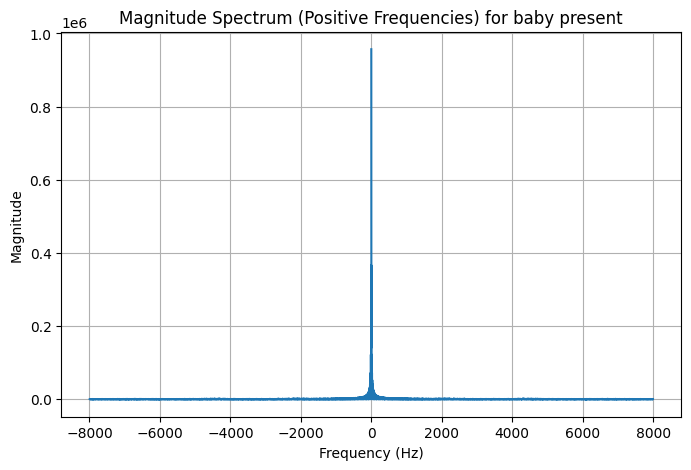

In [6]:
plt.figure(figsize=(8, 5))  # Set the figure size for better readability
plt.plot(fft_df['Frequency'], fft_df['FFT Magnitude'])  # Plot positive frequency vs magnitude
plt.title('Magnitude Spectrum (Positive Frequencies) for baby present')  # Title of the plot
plt.xlabel('Frequency (Hz)')  # Label for the x-axis
plt.ylabel('Magnitude')  # Label for the y-axis
plt.grid(True)  # Show grid for better readability
plt.show()  # Display the plot

## Store the data calculated

In [7]:
numpy_array = fft_df.to_numpy()
print(os.getcwd())
# Save the array to a file
np.save((present_dir+'withbaby_train.npy'), numpy_array)

/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/code
